## Second order ODE:
$$
\frac{d^2 y}{dx^2} + p(x) \frac{dy}{dx} + q(x)y = f(x) \tag{0}
$$
$$
x \in [0,1] \tag{1}
$$
$$
y(0) = A \tag{2}
$$
$$
y(1) = B \tag{3}
$$

## Example Function and BC
$$
\begin{cases}
p(x) = 0 \\
q(x) = 0 \\
f(x) = -1
\end{cases} \tag{4}
$$
$$
\begin{cases}
y(0) = 0 \\
y(1) = 0
\end{cases} \tag{5}
$$

## Exact Solution
$$
y(x) = -\frac{1}{2} x^2 + \frac{1}{2} x \tag{6}
$$


tensor(0.9982, grad_fn=<AddBackward0>)
tensor(0.8585, grad_fn=<AddBackward0>)
tensor(9.5373e+11, grad_fn=<AddBackward0>)
tensor(2.5611, grad_fn=<AddBackward0>)
tensor(0.0428, grad_fn=<AddBackward0>)
tensor(0.0083, grad_fn=<AddBackward0>)
tensor(0.0038, grad_fn=<AddBackward0>)
tensor(0.0008, grad_fn=<AddBackward0>)
tensor(9.4359e-05, grad_fn=<AddBackward0>)
tensor(2.6044e-05, grad_fn=<AddBackward0>)
tensor(2.1810e-05, grad_fn=<AddBackward0>)
tensor(0.0005, grad_fn=<AddBackward0>)
tensor(1.6714e-05, grad_fn=<AddBackward0>)
tensor(1.3986e-05, grad_fn=<AddBackward0>)
tensor(1.2325e-05, grad_fn=<AddBackward0>)
tensor(1.0770e-05, grad_fn=<AddBackward0>)
tensor(9.7848e-06, grad_fn=<AddBackward0>)
tensor(9.7705e-06, grad_fn=<AddBackward0>)
tensor(9.6237e-06, grad_fn=<AddBackward0>)
tensor(9.6216e-06, grad_fn=<AddBackward0>)


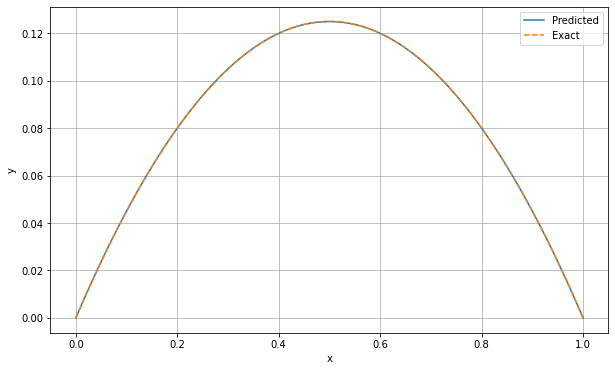

In [27]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer = nn.Linear(1, 10)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        layer_out = torch.sigmoid(self.hidden_layer(x))
        output = self.output_layer(layer_out)
        return output
    
def f(x):
    return -torch.ones(x.shape[0], x.shape[1])

def loss(net_, x_):
    x_.requires_grad = True
    y = net_(x_)
    dy_dx = torch.autograd.grad(y.sum(), x_, create_graph=True)[0]
    y_double_prime = torch.autograd.grad(dy_dx.sum(), x_, create_graph=True)[0]
    
    mse_f = torch.mean((y_double_prime - f(x_))**2 )
    #mse_f = torch.mean((y - f(x_))**2 )
    # mse_f = torch.mean((dy_dx - f(x_))**2 )
    mse_u = 0.5*(y[0, 0] - 0.)**2 + 0.5*(y[-1, 0] - 0.)**2
    
    return mse_f + mse_u

""" LBFGS 사용 시 closure 선언 필요 """
def closure(opt_, net_, x_):
    opt_.zero_grad()
    l = loss(net_, x_)
    l.backward()
    return l

net = Network()
optimizer = torch.optim.LBFGS(net.parameters())
x = torch.linspace(0, 1, 100)[:, None]

epochs = 20
for i in range(epochs):
    loss_ = optimizer.step(lambda: closure(optimizer, net, x))
    print(loss_)
    
xx = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    yy = net(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy, label="Predicted")
plt.plot(xx, -0.5*torch.pow(xx, 2) + 0.5*xx, '--', label="Exact")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

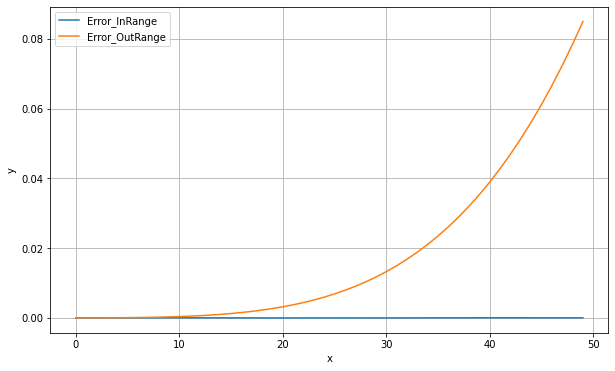

In [19]:
xx = torch.linspace(0, 2, 100)[:, None]
with torch.no_grad():
    yy = net(xx)

error = yy - (-0.5*torch.pow(xx, 2) + 0.5*xx)
plt.figure(figsize=(10, 6))
plt.plot(error[:50], label="Error_InRange")
plt.plot(error[50:], label="Error_OutRange")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()